# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder            #...>non numerical to numerical labels conversion
from sklearn.model_selection import train_test_split      #...>splits data into two random subsets:training and testing
from sklearn.preprocessing import MinMaxScaler            #...>used to scale data features to a specific range, btw 0 and 1
from sklearn.preprocessing import StandardScaler          #...>standardize data features to a mean of 0 and standard  deviation of 1
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report         #to evaluate the performance of a classification model based on precision,recall,F1 score ,and support

# Load Data

In [ ]:
df = pd.read_csv('/content/train.csv')
test= pd.read_csv('/content/test.csv')
df.head()


Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [ ]:
test.describe()

Id              X              Y
count  815329.000000  815328.000000  815328.000000
mean   407664.000000    -122.422709      37.770871
std    235365.353152       0.030251       0.448713
min         0.000000    -122.513642      37.707879
25%    203832.000000    -122.433075      37.752427
50%    407664.000000    -122.416460      37.775421
75%    611496.000000    -122.406911      37.784353
max    815328.000000    -120.500000      90.000000

# Remove Null Values

In [ ]:
for col in df.columns:
    mode_val = df[col].mode()                              #fillna is used to fill the missing values 
    df[col].fillna(value=mode_val, inplace=True)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

for col in test.columns:
    mode_val = test[col].mode()
    test[col].fillna(value=mode_val, inplace=True)
test.fillna(method='ffill', inplace=True)                  #ffill:forward fill (previous rows)
test.fillna(method='bfill', inplace=True)                  #bfill:bakward fill (next rows)

# Visualization

<ipython-input-5-cc9a406ce436>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Category', data=df, palette='Paired', ax=ax, color = 'red')


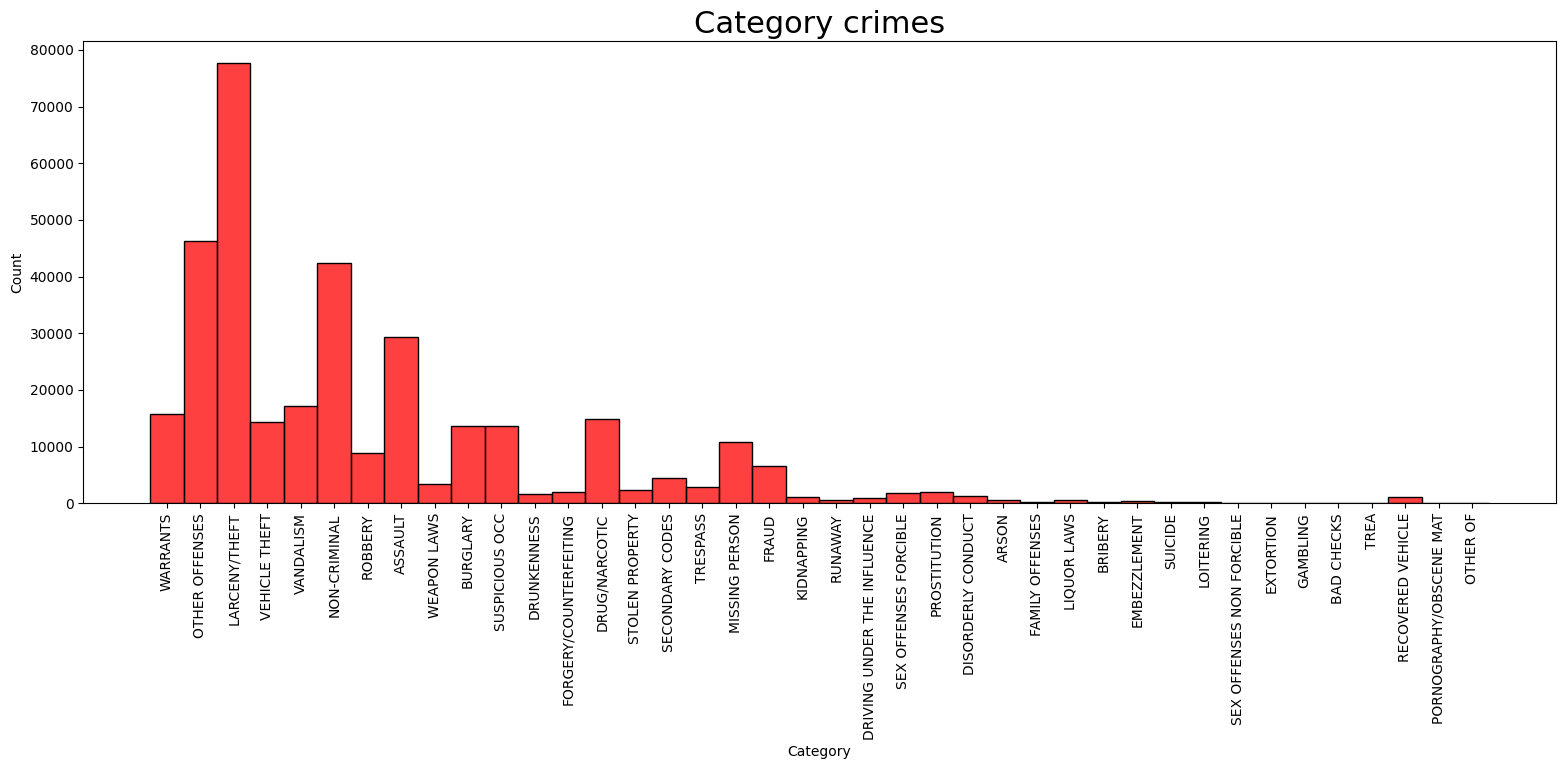

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(19, 6))
sns.histplot(x='Category', data=df, palette='Paired', ax=ax, color = 'red')
ax.tick_params(axis='x', rotation=90)
plt.title("Category crimes", fontsize=22)
plt.show()

<ipython-input-6-67864a4872cd>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='PdDistrict', data=df, palette='Paired', ax=ax, color = 'red')


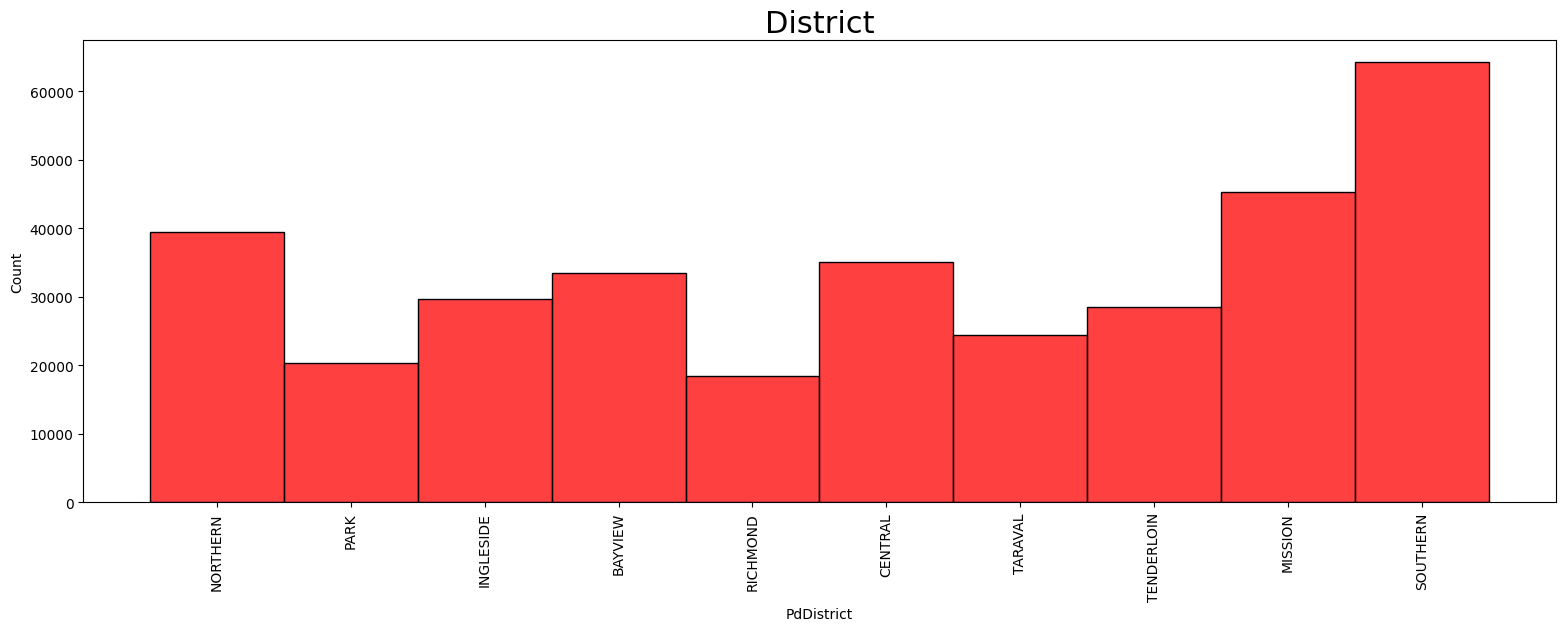

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(19, 6))
sns.histplot(x='PdDistrict', data=df, palette='Paired', ax=ax, color = 'red')
ax.tick_params(axis='x', rotation=90)
plt.title("District", fontsize=22)
plt.show()

<ipython-input-7-5da3ac608507>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Resolution', data=df, palette='Paired', ax=ax, color = 'red')


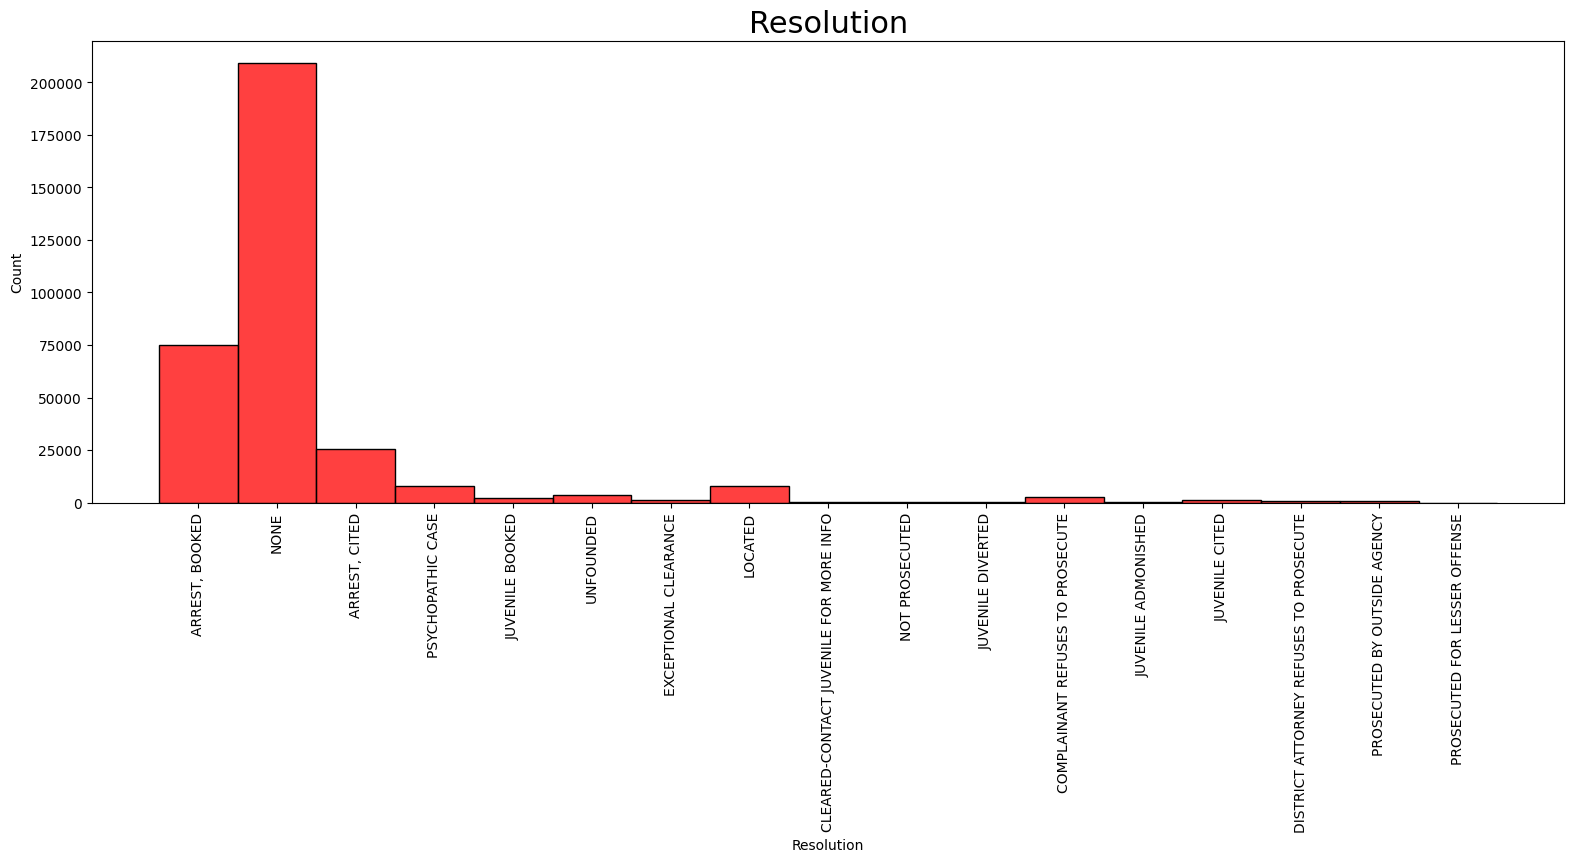

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(19, 6))
sns.histplot(x='Resolution', data=df, palette='Paired', ax=ax, color = 'red')
ax.tick_params(axis='x', rotation=90)
plt.title("Resolution", fontsize=22)
plt.show()

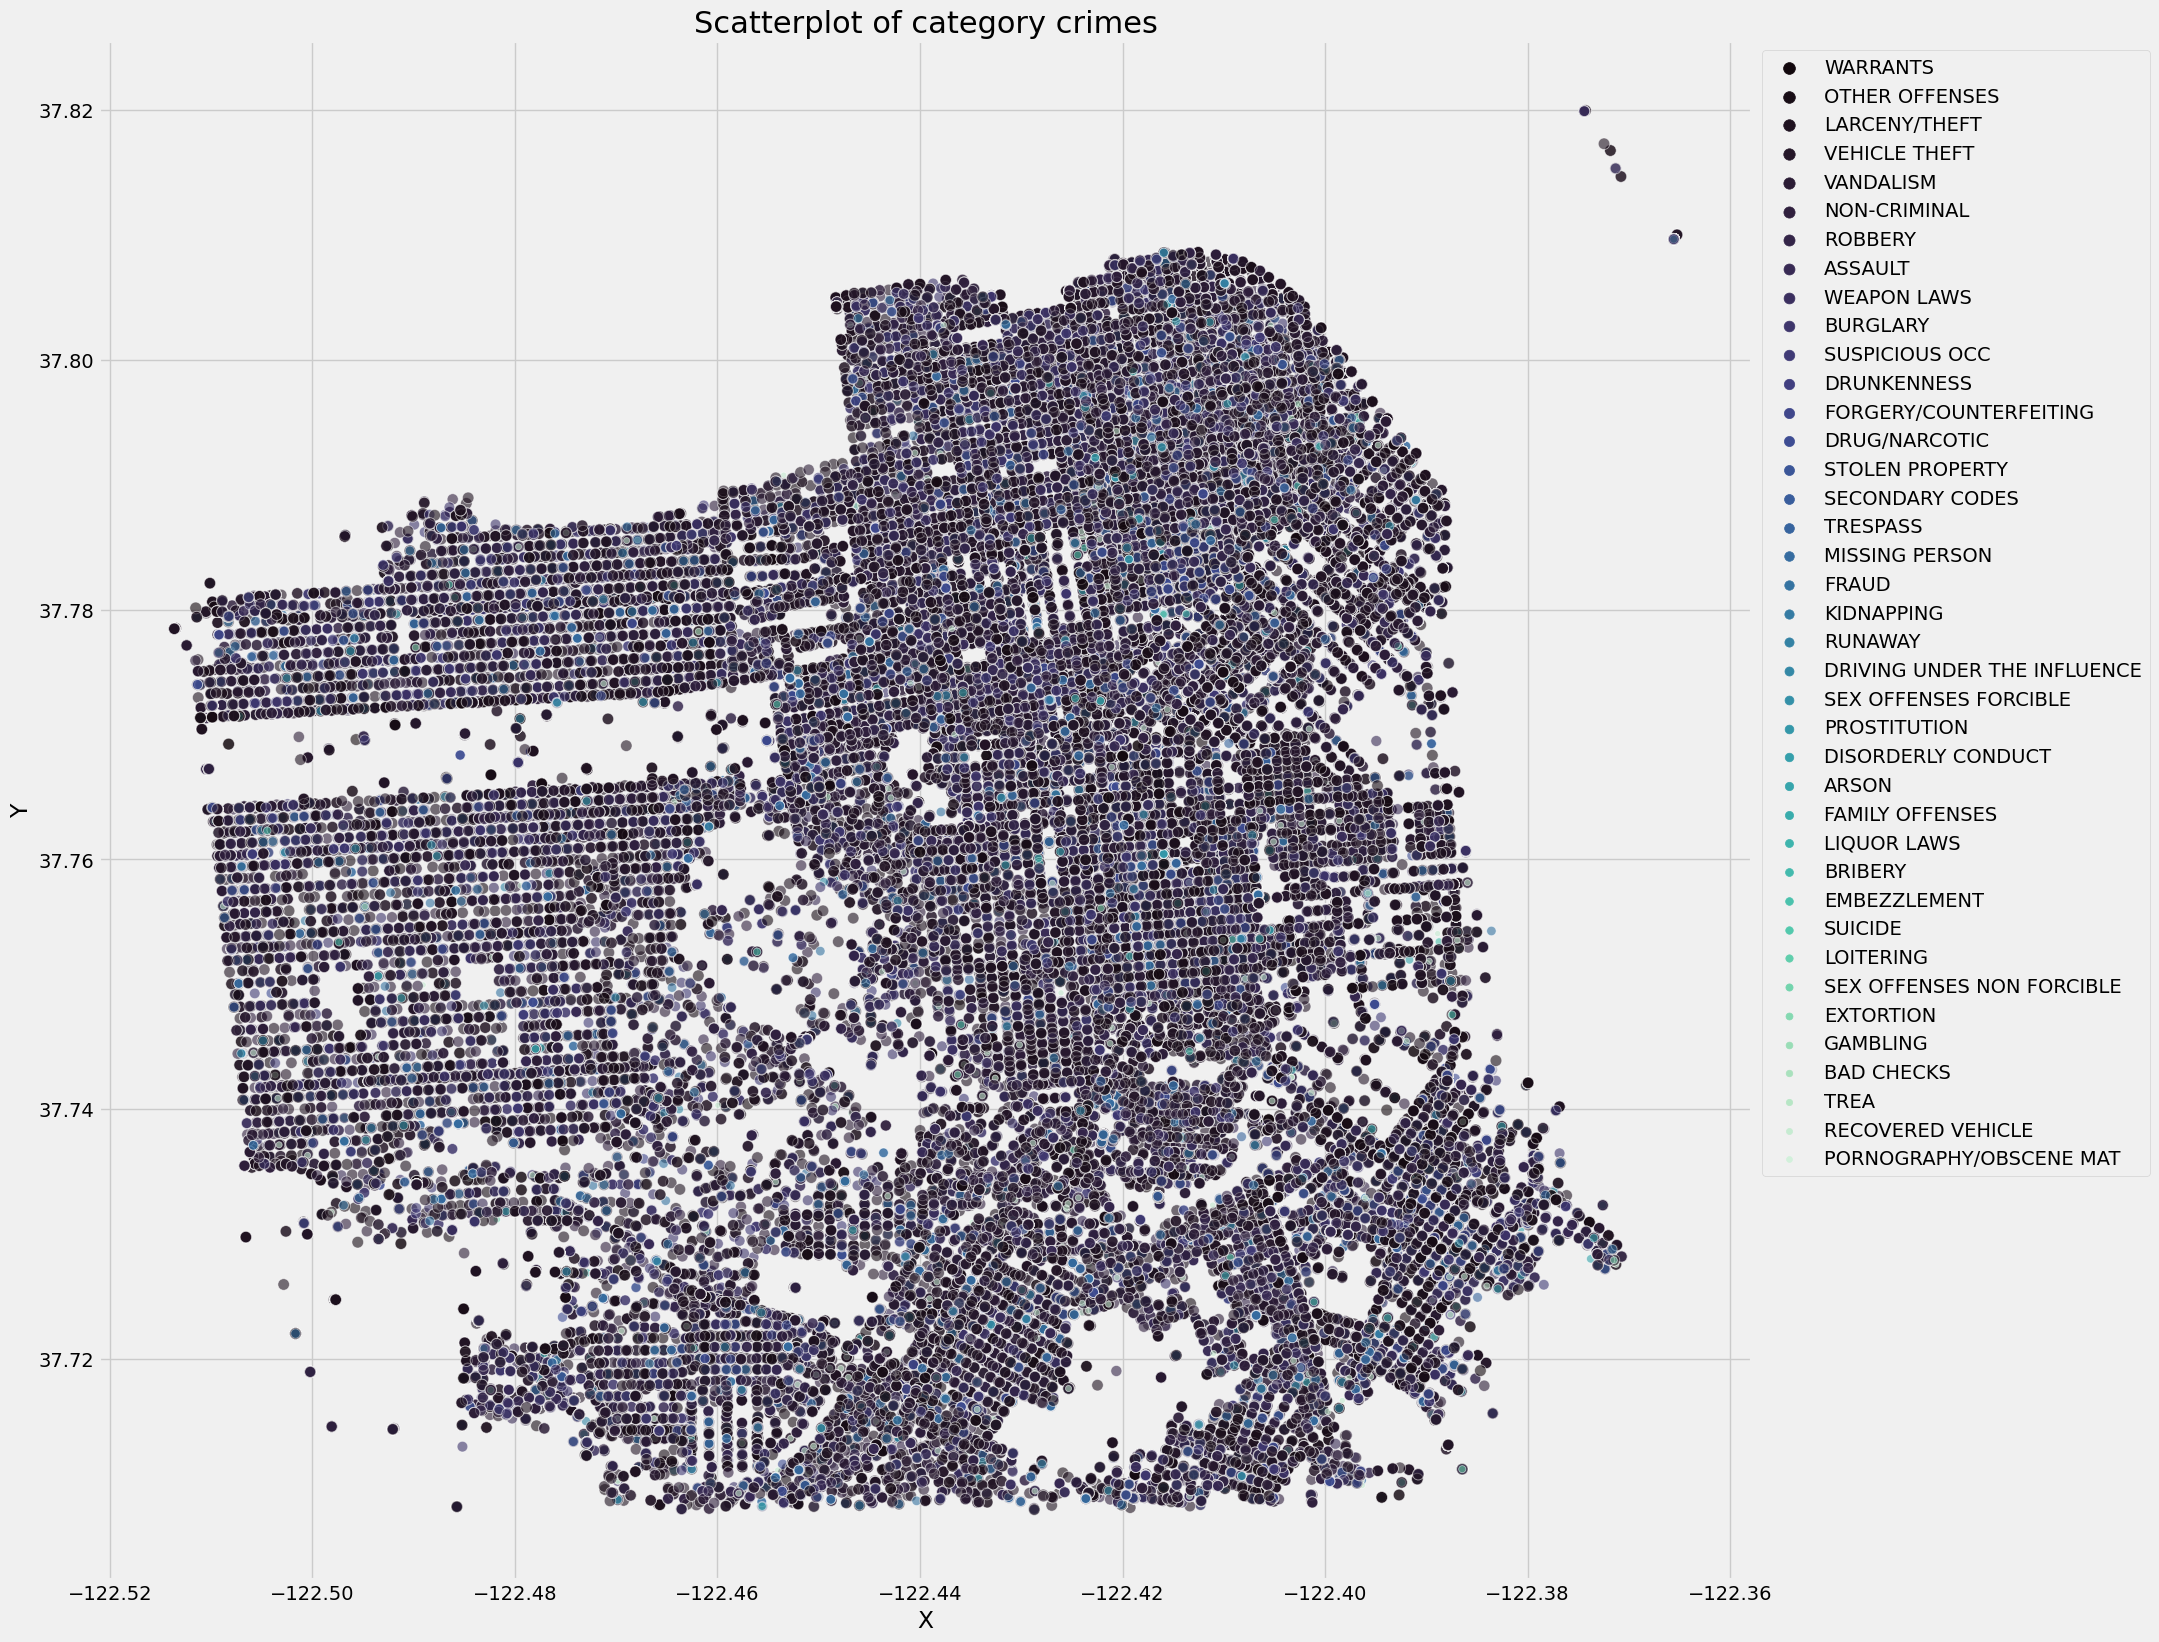

In [ ]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(19, 19))
    sns.scatterplot(data=df.iloc[:250000], x='X', y='Y', alpha=0.6, palette='mako', hue='Category', size='Category')
    plt.title("Scatterplot of category crimes", fontsize=22) 
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

# EDA 

---



In [ ]:
df.shape

(339149, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339149 entries, 0 to 339148
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       339149 non-null  object 
 1   Category    339149 non-null  object 
 2   Descript    339149 non-null  object 
 3   DayOfWeek   339149 non-null  object 
 4   PdDistrict  339149 non-null  object 
 5   Resolution  339149 non-null  object 
 6   Address     339149 non-null  object 
 7   X           339149 non-null  float64
 8   Y           339149 non-null  float64
dtypes: float64(2), object(7)
memory usage: 23.3+ MB


In [ ]:
df.duplicated().sum()

843

In [ ]:
df.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [ ]:
df.nunique()

Dates         148035
Category          40
Descript         830
DayOfWeek          7
PdDistrict        10
Resolution        17
Address        19162
X              25072
Y              25072
dtype: int64

In [ ]:
df.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [ ]:
df['Dates'] = pd.to_datetime(df['Dates'])

df['year'] = df['Dates'].dt.year
df['month'] = df['Dates'].dt.month
df['day_of_month'] = df['Dates'].dt.day
df['day_of_week'] = df['Dates'].dt.day_of_week
df['hour'] = df['Dates'].dt.hour
df.drop(['Dates', 'DayOfWeek'], axis = 1, inplace = True)
df.dtypes

Category         object
Descript         object
PdDistrict       object
Resolution       object
Address          object
X               float64
Y               float64
year              int64
month             int64
day_of_month      int64
day_of_week       int64
hour              int64
dtype: object

In [ ]:
test['Dates'] = pd.to_datetime(test['Dates'])
test['Year'] = test['Dates'].dt.year
test['Month'] = test['Dates'].dt.month
test['day_of_month'] = test['Dates'].dt.day
test['day_of_week'] = test['Dates'].dt.day_of_week
test['hour'] = test['Dates'].dt.hour

test.drop(['Dates', 'DayOfWeek'], axis = 1, inplace = True)

In [ ]:
df.head()

Category                      Descript PdDistrict      Resolution  \
0        WARRANTS                WARRANT ARREST   NORTHERN  ARREST, BOOKED   
1  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   NORTHERN  ARREST, BOOKED   
2  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   NORTHERN  ARREST, BOOKED   
3   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   NORTHERN            NONE   
4   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO       PARK            NONE   

                     Address           X          Y  year  month  \
0         OAK ST / LAGUNA ST -122.425892  37.774599  2015      5   
1         OAK ST / LAGUNA ST -122.425892  37.774599  2015      5   
2  VANNESS AV / GREENWICH ST -122.424363  37.800414  2015      5   
3   1500 Block of LOMBARD ST -122.426995  37.800873  2015      5   
4  100 Block of BRODERICK ST -122.438738  37.771541  2015      5   

   day_of_month  day_of_week  hour  
0            13            2    23  
1            13            2    23  
2            13            2    23  
3            13            2    23  
4            13            2    23

In [ ]:
test.head()

Id PdDistrict                   Address           X          Y  Year  \
0   0    BAYVIEW   2000 Block of THOMAS AV -122.399588  37.735051  2015   
1   1    BAYVIEW        3RD ST / REVERE AV -122.391523  37.732432  2015   
2   2   NORTHERN    2000 Block of GOUGH ST -122.426002  37.792212  2015   
3   3  INGLESIDE  4700 Block of MISSION ST -122.437394  37.721412  2015   
4   4  INGLESIDE  4700 Block of MISSION ST -122.437394  37.721412  2015   

   Month  day_of_month  day_of_week  hour  
0      5            10            6    23  
1      5            10            6    23  
2      5            10            6    23  
3      5            10            6    23  
4      5            10            6    23

In [ ]:
df.columns = [item.lower() for item in df.columns]            #changing the column names to lower case
df.head()

category                      descript pddistrict      resolution  \
0        WARRANTS                WARRANT ARREST   NORTHERN  ARREST, BOOKED   
1  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   NORTHERN  ARREST, BOOKED   
2  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   NORTHERN  ARREST, BOOKED   
3   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   NORTHERN            NONE   
4   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO       PARK            NONE   

                     address           x          y  year  month  \
0         OAK ST / LAGUNA ST -122.425892  37.774599  2015      5   
1         OAK ST / LAGUNA ST -122.425892  37.774599  2015      5   
2  VANNESS AV / GREENWICH ST -122.424363  37.800414  2015      5   
3   1500 Block of LOMBARD ST -122.426995  37.800873  2015      5   
4  100 Block of BRODERICK ST -122.438738  37.771541  2015      5   

   day_of_month  day_of_week  hour  
0            13            2    23  
1            13            2    23  
2            13            2    23  
3            13            2    23  
4            13            2    23

In [ ]:
pd.crosstab(df['day_of_week'], df['category'])            #compare the results of variables       

category     ARSON  ASSAULT  BAD CHECKS  BRIBERY  BURGLARY  \
day_of_week                                                  
0               96     3913          18       20      1886   
1               82     3795          10       15      1999   
2               76     3931          20       21      2032   
3               69     3868          15       16      1945   
4               85     4228          15       25      2249   
5               83     4757           5       22      1826   
6               70     4797           4       20      1647   

category     DISORDERLY CONDUCT  DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  \
day_of_week                                                                   
0                           206                          118           1974   
1                           238                          108           2208   
2                           225                           96           2688   
3                           152                          108           2459   
4                           154                          150           2118   
5                           183                          202           1773   
6                           180                          204           1713   

category     DRUNKENNESS  EMBEZZLEMENT  ...  SEX OFFENSES NON FORCIBLE  \
day_of_week                             ...                              
0                    196            79  ...                          6   
1                    184            44  ...                         10   
2                    205            42  ...                          7   
3                    174            48  ...                          8   
4                    236            66  ...                          7   
5                    324            47  ...                          6   
6                    322            38  ...                          6   

category     STOLEN PROPERTY  SUICIDE  SUSPICIOUS OCC  TREA  TRESPASS  \
day_of_week                                                             
0                        314       31            1880     1       428   
1                        334       21            1970     1       454   
2                        354       22            2110     0       443   
3                        323       31            1933     1       346   
4                        334       16            2043     1       376   
5                        306       23            1779     2       368   
6                        316       22            1843     0       375   

category     VANDALISM  VEHICLE THEFT  WARRANTS  WEAPON LAWS  
day_of_week                                                   
0                 2349           1951      2136          464  
1                 2252           1927      2267          441  
2                 2256           1935      2694          517  
3                 2236           1932      2380          531  
4                 2695           2383      2266          509  
5                 2804           2234      2016          512  
6                 2571           2026      1991          493  

[7 rows x 40 columns]

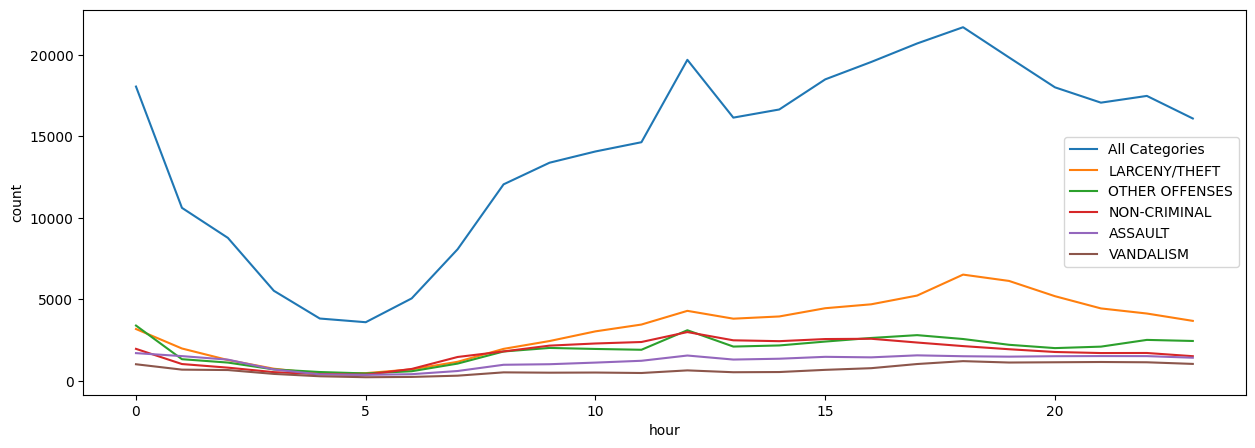

In [ ]:
category_count = df.category.value_counts().to_frame().reset_index()
top5category = category_count.iloc[:5] 

df_cat = df.hour.value_counts().to_frame().sort_index()
plt.figure(figsize = (15, 5))
plt.plot(df_cat)

for item in top5category['index']:
    df_cat = df[df.category == item].hour.value_counts().to_frame().sort_index()
    plt.plot(df_cat)
plt.legend(['All Categories'] + list(top5category['index'].values))
plt.xlabel('hour')
_ = plt.ylabel('count')

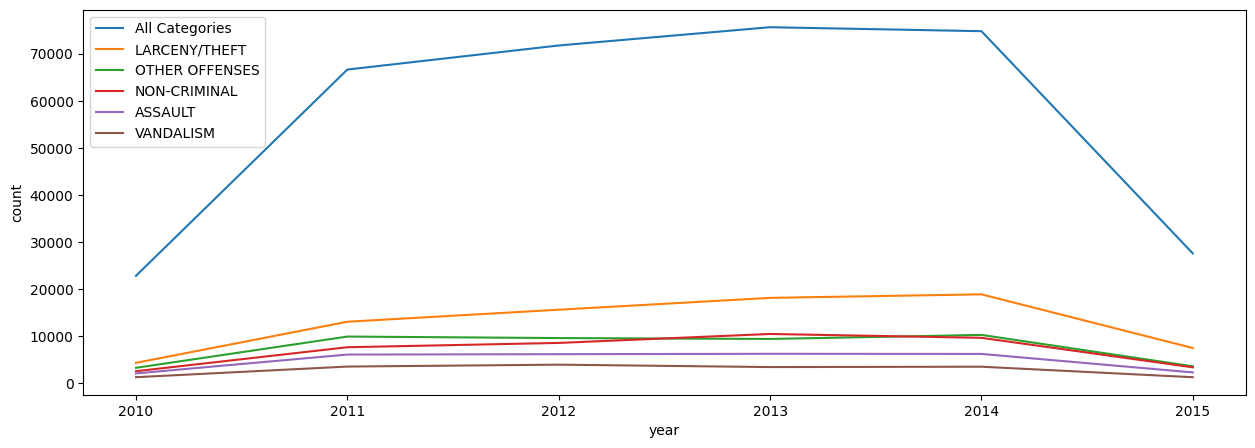

In [ ]:
category_count = df.category.value_counts().to_frame().reset_index()
top5category = category_count.iloc[:5] 

df_cat = df.year.value_counts().to_frame().sort_index()
plt.figure(figsize = (15, 5))
plt.plot(df_cat)

for item in top5category['index']:
    df_cat = df[df.category == item].year.value_counts().to_frame().sort_index()
    plt.plot(df_cat)
plt.legend(['All Categories'] + list(top5category['index'].values))
plt.xlabel('year')
_ = plt.ylabel('count')

<Axes: xlabel='pddistrict', ylabel='category'>

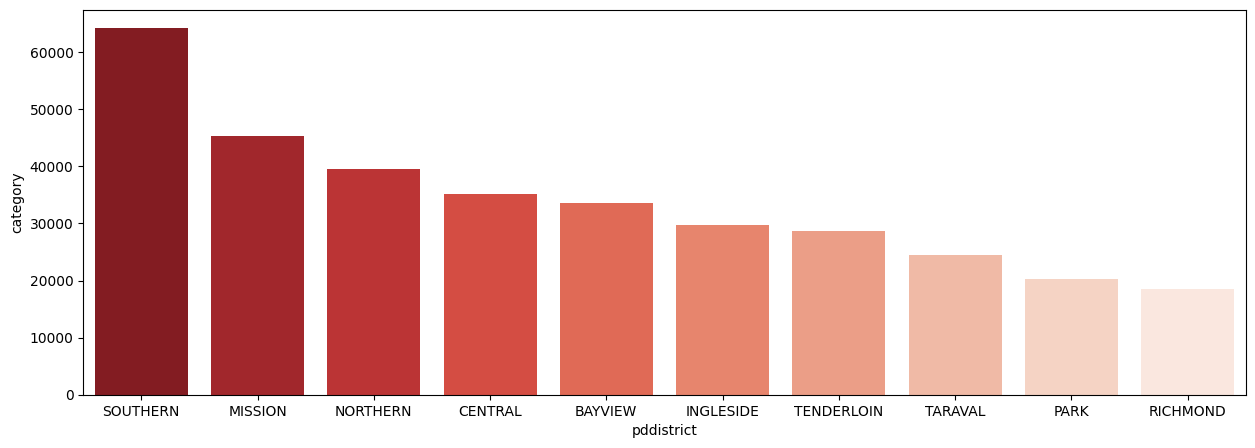

In [ ]:
df1 = df.groupby('pddistrict').count().reset_index()[['pddistrict', 'category']].sort_values('category', ascending = False)
plt.figure(figsize = (15, 5))
sns.barplot(x = 'pddistrict',y = 'category',data = df1, palette= 'Reds_r')

# Data preprocessing

Variable Encoding

In [ ]:
top200Des = df['descript'].value_counts()[:200].index
df['descript'] = df['descript'].apply(lambda x :x if x in top200Des else 'other' )
x = df.drop(['category', 'address'], axis = 1)
y = df['category']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
x['descript'] = le.fit_transform(x['descript'])
x['pddistrict'] = le.fit_transform(x['pddistrict'])
x['resolution'] = le.fit_transform(x['resolution'])


split data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 1)
print('x train :', x_train.shape,'\t\tx test :', x_test.shape)
print('y train :', y_train.shape,'\t\ty test :', y_test.shape)

x train : (288276, 10) 		x test : (50873, 10)
y train : (288276,) 		y test : (50873,)


# feature scaling

In [ ]:
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Train your model

# KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)



In [ ]:
accuracy_score(y_pred, y_test)

0.42816425215733295

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

array([[   4,   43,    0, ...,    9,    2,    0],
       [  16, 2324,    0, ...,  194,  105,   10],
       [   0,    3,    0, ...,    8,    0,    0],
       ...,
       [   3,  217,    1, ..., 1166,   10,    2],
       [   4,  185,    1, ...,   27,  685,   13],
       [   0,   63,    1, ...,   18,   42,   15]])

In [ ]:
print((classification_report(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.07      0.04      0.05        91
           1       0.39      0.52      0.45      4438
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        16
           4       0.37      0.39      0.38      2030
           5       0.28      0.21      0.24       218
           6       0.10      0.05      0.07       164
           7       0.42      0.61      0.50      2261
           8       0.10      0.09      0.09       233
           9       0.00      0.00      0.00        56
          10       0.00      0.00      0.00        10
          11       0.20      0.12      0.15        26
          12       0.03      0.01      0.02       315
          13       0.21      0.12      0.15       940
          14       0.00      0.00      0.00        10
          15       0.03      0.01      0.02       172
          16       0.54      0.77      0.63     11579
          17       0.04    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [ ]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [ ]:
accuracy_score(y_pred, y_test)


0.921903563776463

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

array([[  47,    9,    0, ...,    0,    0,    4],
       [   0, 4133,    0, ...,    4,    7,   14],
       [   0,    2,    0, ...,    0,    0,    0],
       ...,
       [   0,    2,    0, ..., 2123,    1,    2],
       [   0,    9,    0, ...,    1, 2168,    5],
       [   0,   21,    0, ...,    0,   10,  273]])

In [ ]:
print((classification_report(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.96      0.52      0.67        91
           1       0.92      0.93      0.93      4438
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        16
           4       0.92      0.94      0.93      2030
           5       0.85      0.54      0.66       218
           6       0.91      0.75      0.82       164
           7       0.89      0.92      0.91      2261
           8       0.86      0.66      0.75       233
           9       0.20      0.07      0.11        56
          10       0.00      0.00      0.00        10
          11       0.46      0.23      0.31        26
          12       0.78      0.50      0.61       315
          13       0.91      0.77      0.84       940
          14       0.00      0.00      0.00        10
          15       0.56      0.22      0.32       172
          16       0.98      0.98      0.98     11579
          17       0.68    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [ ]:
dtc = DecisionTreeClassifier(random_state= 1)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.9527647278517092

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

array([[  59,    1,    0, ...,    0,    0,    4],
       [   2, 4253,    0, ...,    3,    4,   14],
       [   0,    0,    1, ...,    0,    0,    0],
       ...,
       [   0,    3,    1, ..., 2167,    1,    5],
       [   2,    4,    0, ...,    0, 2231,    7],
       [   2,   21,    0, ...,    1,    7,  350]])

In [ ]:
print((classification_report(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66        91
           1       0.96      0.96      0.96      4438
           2       0.05      0.05      0.05        19
           3       0.00      0.00      0.00        16
           4       0.92      0.93      0.93      2030
           5       0.82      0.81      0.81       218
           6       0.85      0.87      0.86       164
           7       0.92      0.92      0.92      2261
           8       1.00      1.00      1.00       233
           9       0.05      0.05      0.05        56
          10       0.00      0.00      0.00        10
          11       0.27      0.15      0.20        26
          12       0.76      0.78      0.77       315
          13       0.88      0.89      0.89       940
          14       0.11      0.10      0.11        10
          15       0.63      0.76      0.69       172
          16       0.99      0.99      0.99     11579
          17       0.59    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# XGBClassifier

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.9570695653883199

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

array([[  57,    1,    0, ...,    0,    1,    6],
       [   0, 4232,    0, ...,    1,    1,   17],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    1,    0, ..., 2168,    0,    2],
       [   0,    2,    0, ...,    0, 2231,    6],
       [   0,    4,    0, ...,    0,    1,  356]])

In [ ]:
print((classification_report(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.97      0.63      0.76        91
           1       0.98      0.95      0.97      4438
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        16
           4       0.90      0.94      0.92      2030
           5       0.97      0.81      0.89       218
           6       0.93      0.86      0.90       164
           7       0.89      0.95      0.92      2261
           8       1.00      1.00      1.00       233
           9       0.23      0.14      0.18        56
          10       0.00      0.00      0.00        10
          11       0.44      0.27      0.33        26
          12       0.88      0.78      0.83       315
          13       0.95      0.88      0.92       940
          14       0.00      0.00      0.00        10
          15       0.81      0.78      0.80       172
          16       0.99      0.99      0.99     11579
          17       0.79    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
x

descript  pddistrict  resolution           x          y  year  month  \
0            199           4           0 -122.425892  37.774599  2015      5   
1            190           4           0 -122.425892  37.774599  2015      5   
2            190           4           0 -122.424363  37.800414  2015      5   
3             88           4          11 -122.426995  37.800873  2015      5   
4             88           5          11 -122.438738  37.771541  2015      5   
...          ...         ...         ...         ...        ...   ...    ...   
339144        80           5          10 -122.443585  37.774198  2010      9   
339145       189           3           1 -122.419672  37.765050  2010      9   
339146       102           4          11 -122.420692  37.790577  2010      9   
339147       100           4           1 -122.421012  37.783823  2010      9   
339148       100           4           1 -122.421012  37.783823  2010      9   

        day_of_month  day_of_week  hour  
0                 13            2    23  
1                 13            2    23  
2                 13            2    23  
3                 13            2    23  
4                 13            2    23  
...              ...          ...   ...  
339144             6            0     0  
339145             6            0     0  
339146             6            0     0  
339147             6            0     0  
339148             6            0     0  

[339149 rows x 10 columns]

In [ ]:
y

array([38, 22, 22, ..., 20, 24, 21])

In [ ]:
y = le.fit_transform(y)

In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 K

In [ ]:
import gradio as gr

In [ ]:
df.head()

category                      descript pddistrict      resolution  \
0        WARRANTS                WARRANT ARREST   NORTHERN  ARREST, BOOKED   
1  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   NORTHERN  ARREST, BOOKED   
2  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   NORTHERN  ARREST, BOOKED   
3   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   NORTHERN            NONE   
4   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO       PARK            NONE   

                     address           x          y  year  month  \
0         OAK ST / LAGUNA ST -122.425892  37.774599  2015      5   
1         OAK ST / LAGUNA ST -122.425892  37.774599  2015      5   
2  VANNESS AV / GREENWICH ST -122.424363  37.800414  2015      5   
3   1500 Block of LOMBARD ST -122.426995  37.800873  2015      5   
4  100 Block of BRODERICK ST -122.438738  37.771541  2015      5   

   day_of_month  day_of_week  hour  
0            13            2    23  
1            13            2    23  
2            13            2    23  
3            13            2    23  
4            13            2    23

In [ ]:
df = pd.read_csv("/content/test.csv")
def crime(x,y,day_of_week,address):
    sample= np.array([x,y,day_of_week,address]).reshape(1,-1)
    prediction=dtc.predict(sample)    
    #return "Crime" if prediction[0] == 1 else "Not crime"
    return prediction



# Creating the Gradio interface
input_components = [
    #gr.inputs.Textbox(label="descript"),
    #gr.inputs.Textbox(label="pddistrict"),
    #gr.inputs.Textbox(label="resolution"),
    gr.inputs.Number(label="x"),
    gr.inputs.Number(label="y"),
    #gr.inputs.Number(label="year"),
    #gr.inputs.Checkbox(label="month"),
    #gr.inputs.Checkbox(label="day_of_month"),
    gr.inputs.Textbox(label="day_of_week"),
    gr.inputs.Textbox(label="address"),
    #gr.inputs.Number(label="hour")
]

interface = gr.Interface(
    fn=crime,
    inputs=input_components,
    outputs=gr.outputs.Textbox(label=""),
    title="Crime Category Prediction",
    description="Predict the category of the crime based on various factors.",
    layout="vertical",
    theme="compact"
)

# Launching the interface
interface.launch(debug = True,share=True)

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/pyth

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://509a406dc3120f96d0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
